TEMPERATURA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


In [57]:
f = '/home/matheus/Documentos/LACRIO/Analises/Cordillera Blanca/Weather Station Data/CasaDeAgua_CDAWX_4July13_1July19.csv'
df =  pd.read_csv(f, encoding="latin1")

In [58]:

df['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M')

df.set_index('Datetime', inplace=True)

# Calcular a média diária da variável de precipitação
media_diaria = df['Temperature (°C)'].resample('D').mean()

# Criar listas separadas de datas e médias
datas = media_diaria.index.strftime('%m/%d/%Y').tolist()  # Converter as datas para string no formato desejado
medias = media_diaria.tolist()  # Converter as médias para uma lista
datas = pd.to_datetime(datas)
df = pd.DataFrame({'data': datas, 'media': medias})

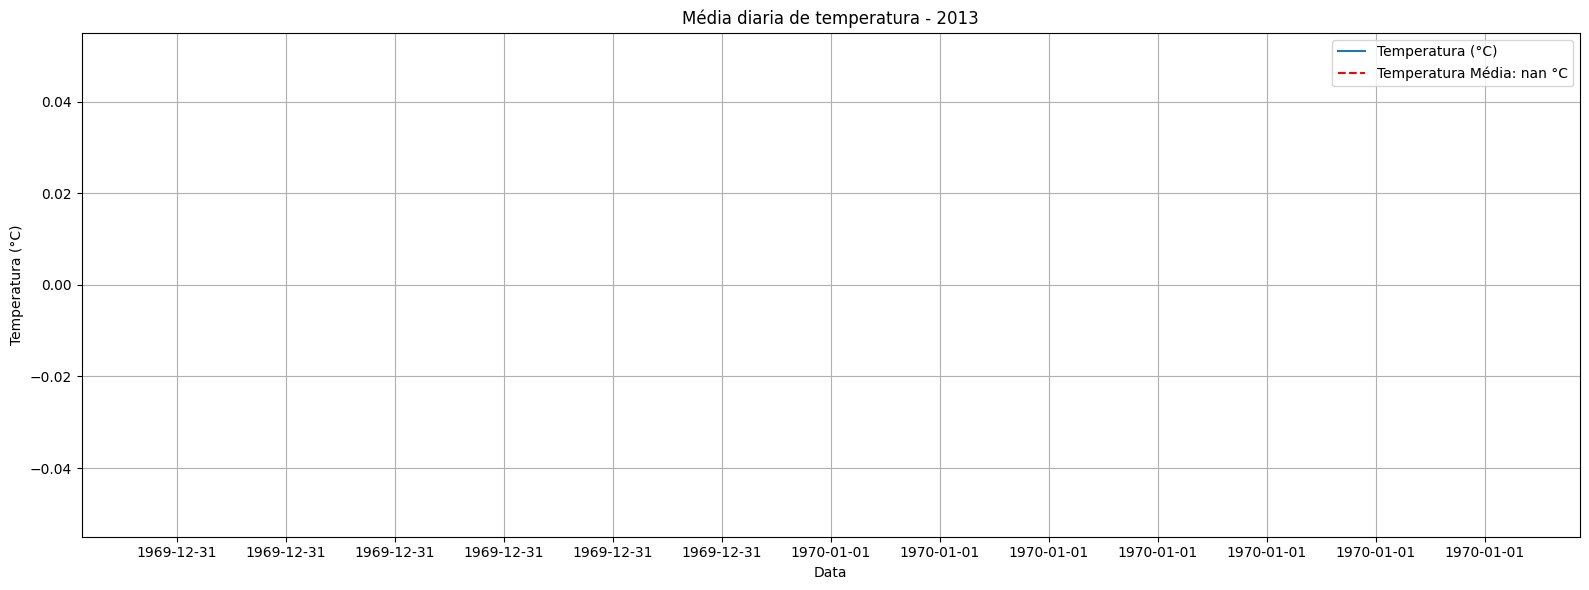

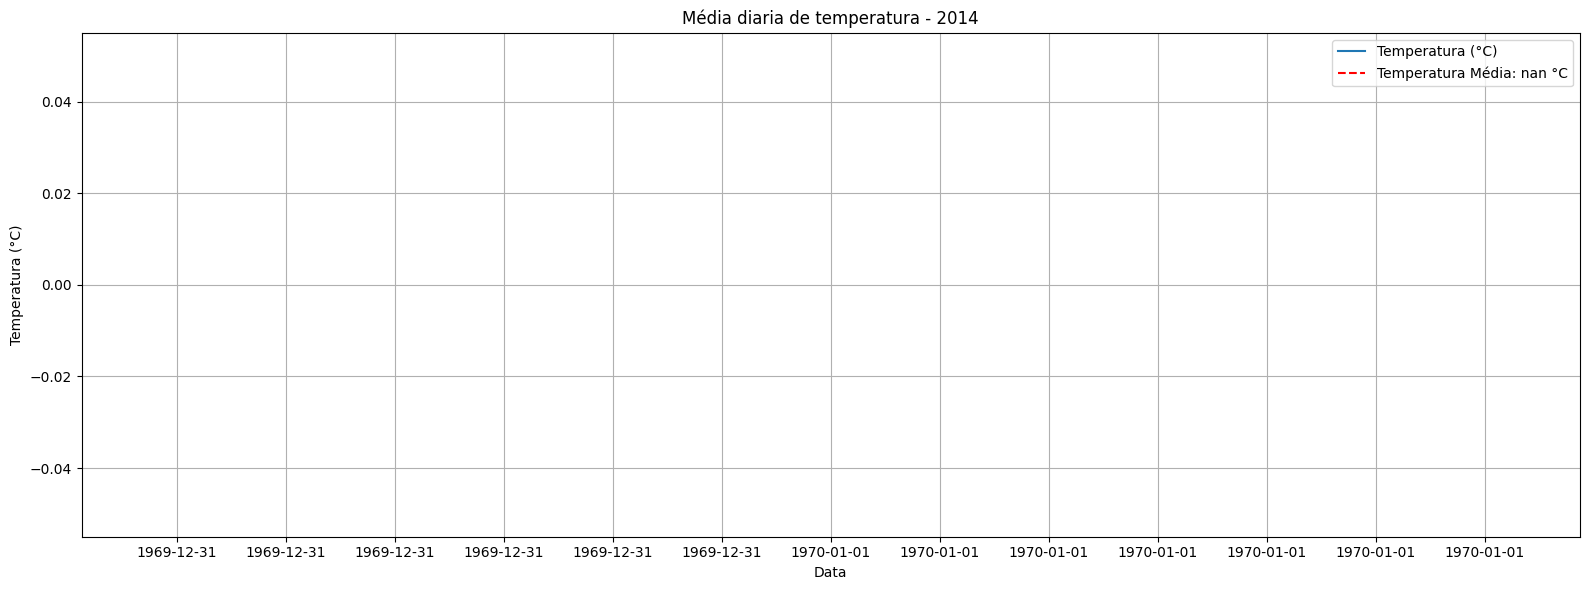

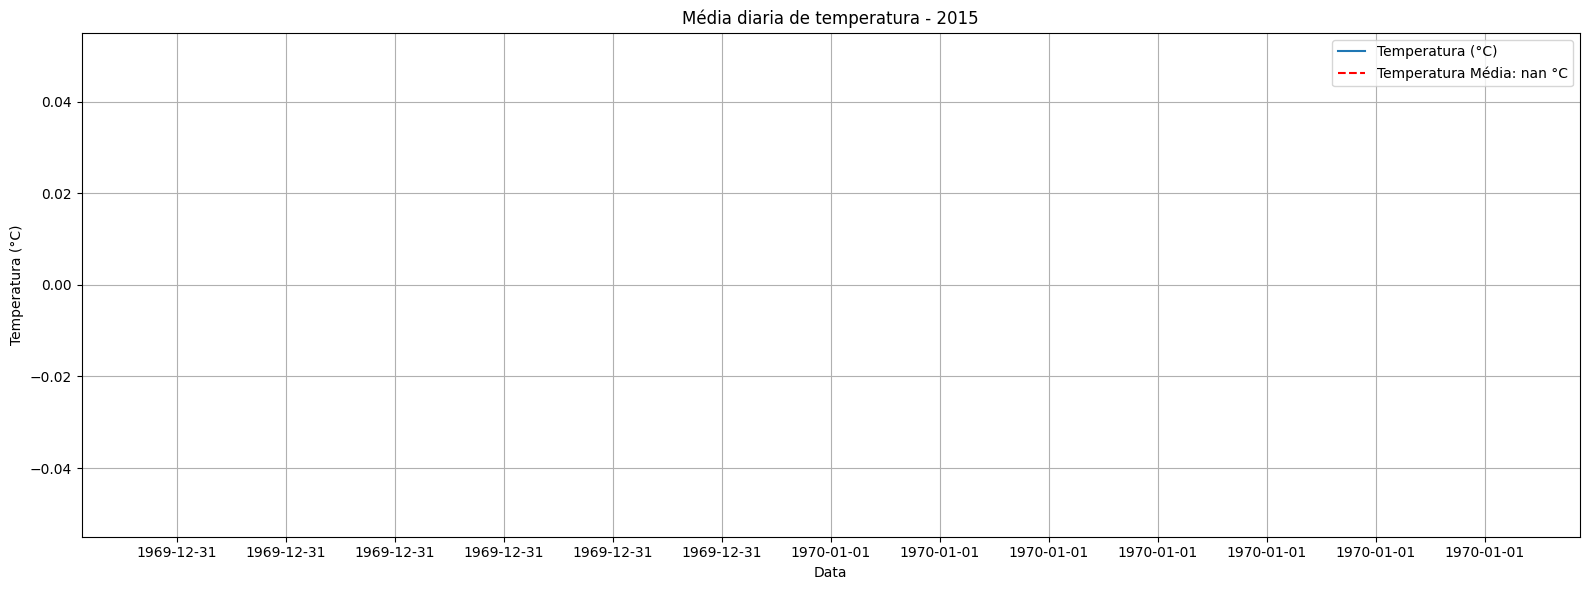

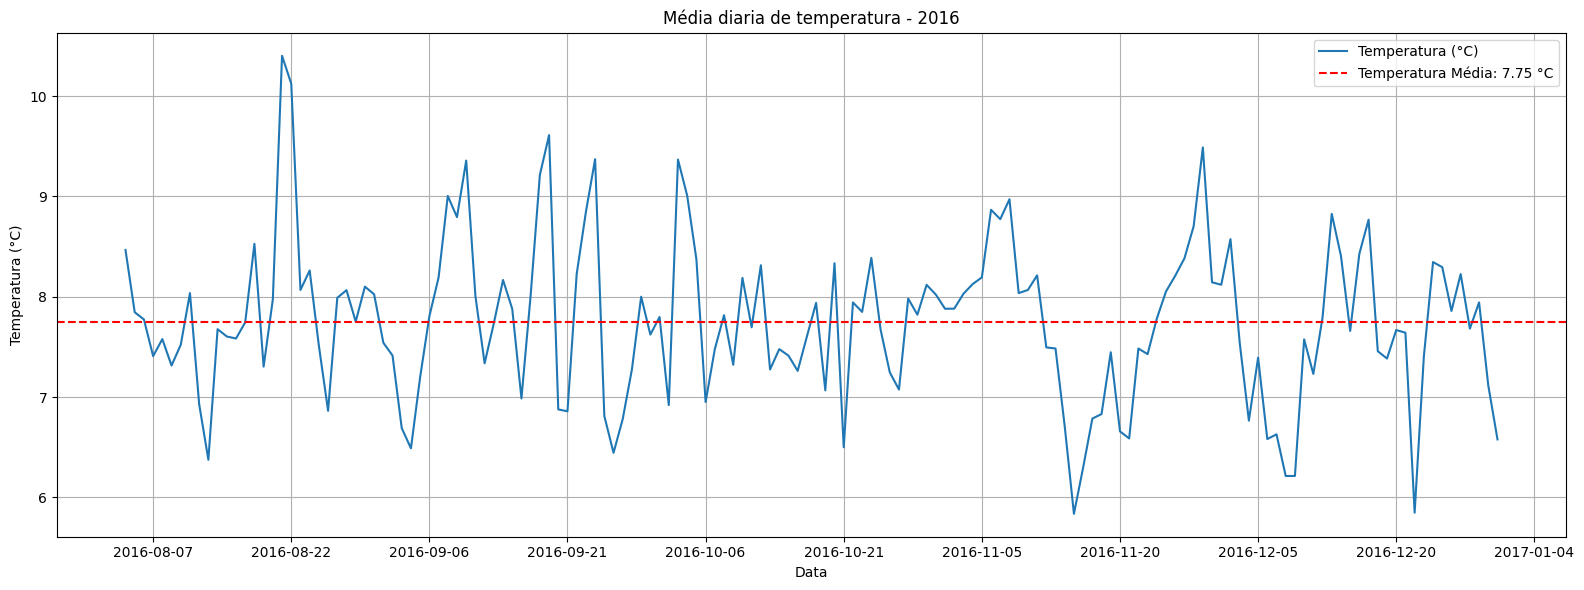

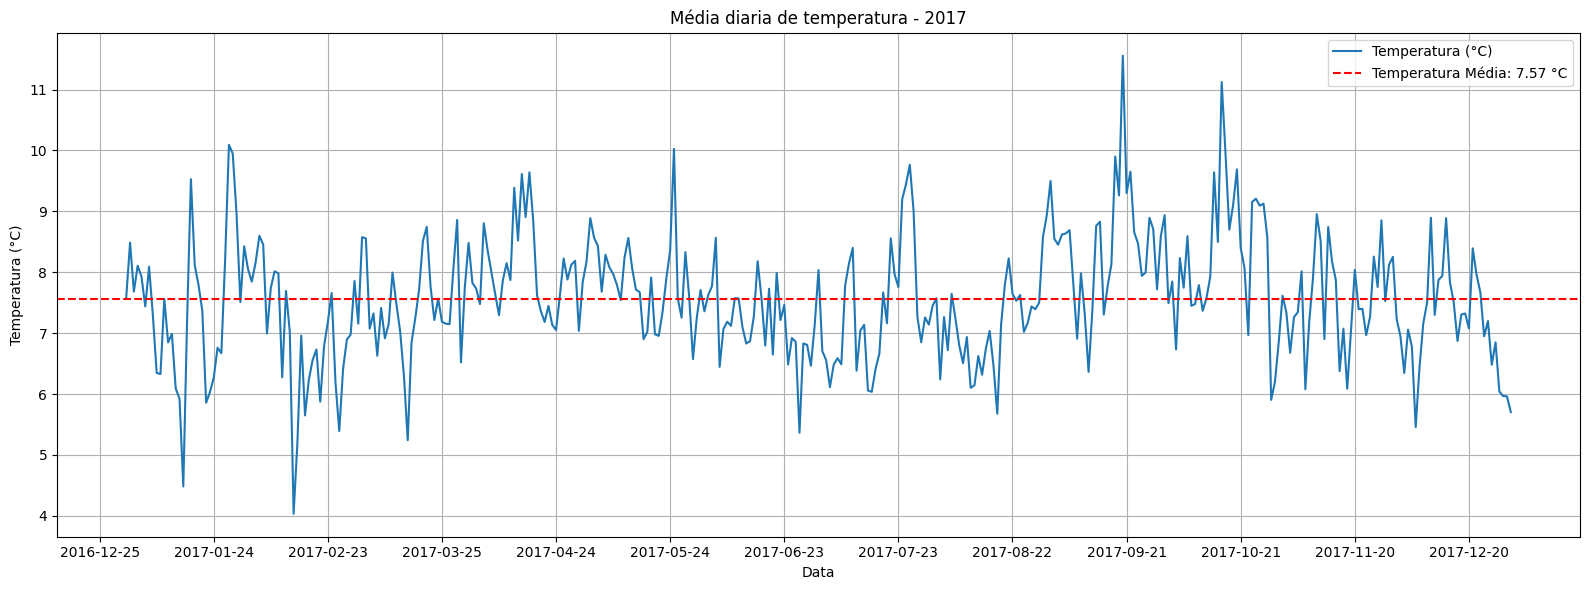

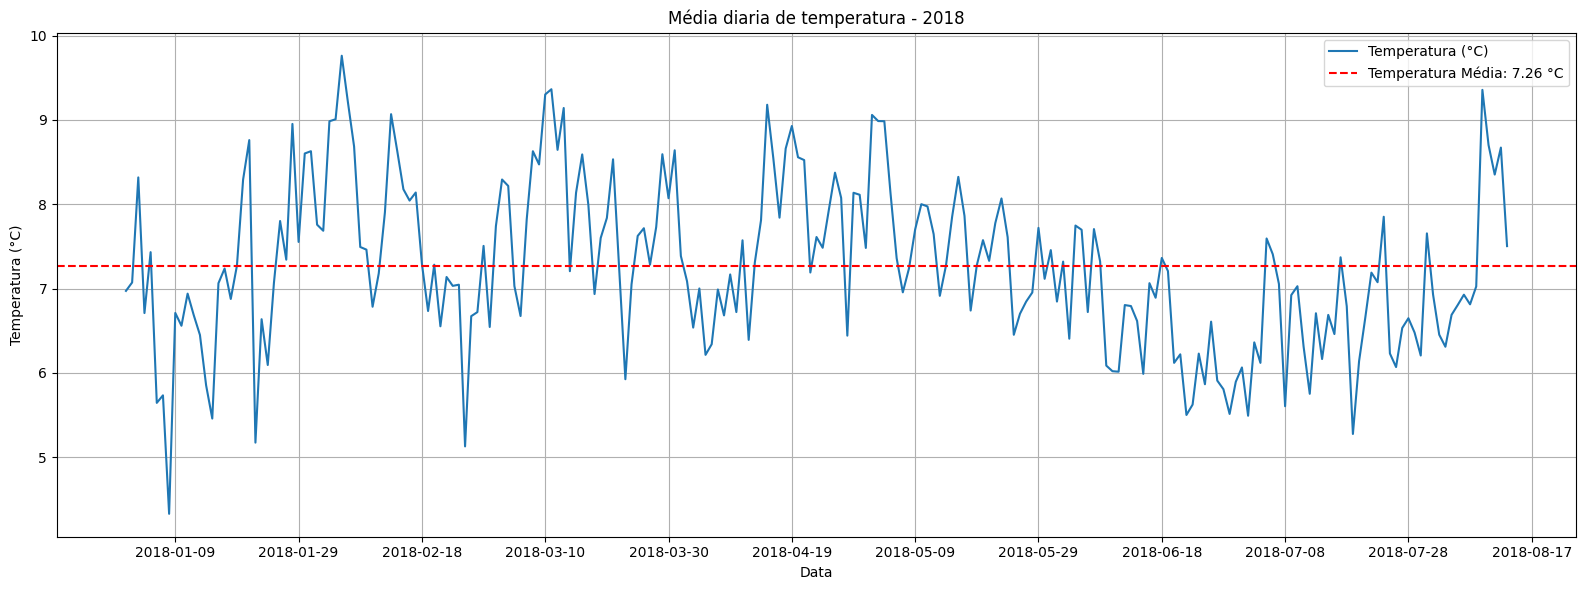

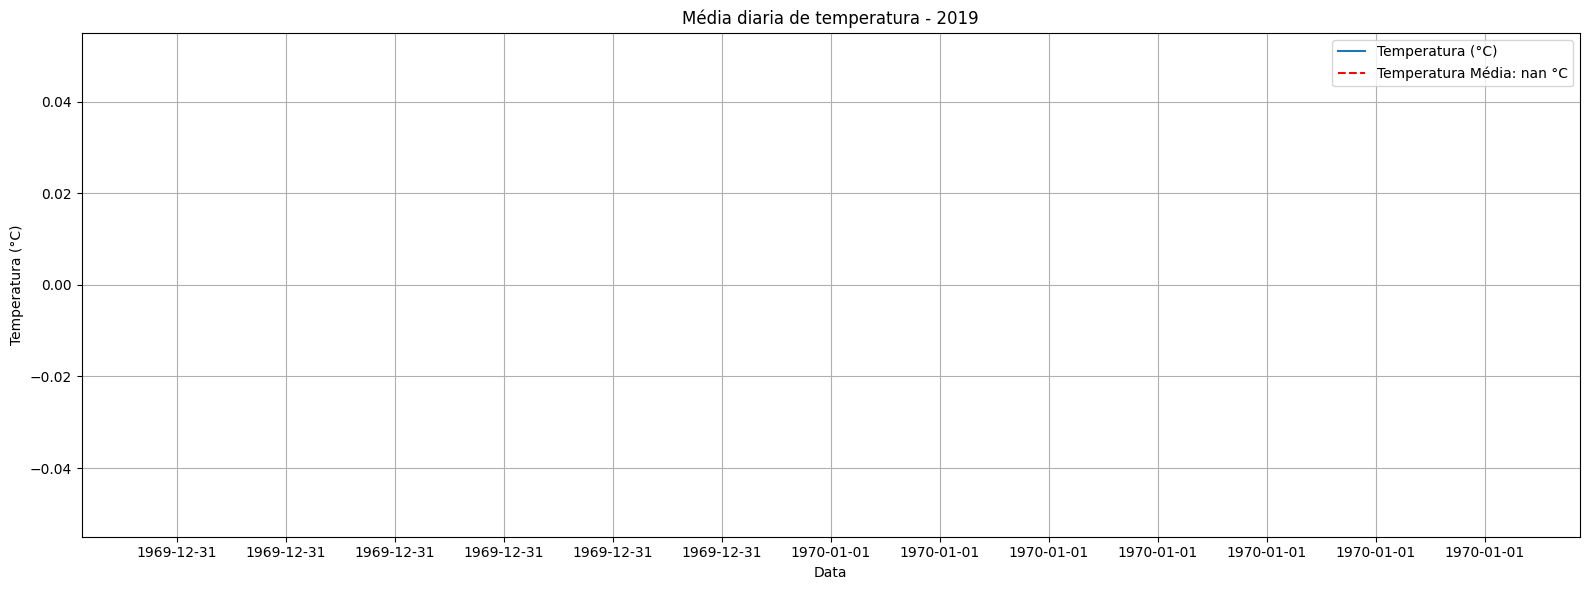

In [59]:
# Obter os anos únicos presentes nos dados
anos_unicos = df['data'].dt.year.unique()

# Criar gráficos separados para cada ano
for ano in anos_unicos:
    # Filtrar os dados para o ano atual
    df_ano = df[df['data'].dt.year == ano]
    
    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df_ano['data'], df_ano['media'], label=f'Temperatura (°C)')
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(14))

    # Calcular a precipitação média para o ano
    temperatura_media = df_ano['media'].mean()

    # Adicionar a linha de precipitação média com valor na legenda
    ax.axhline(y=temperatura_media, color='red', linestyle='--', label=f'Temperatura Média: {temperatura_media:.2f} °C')



    
    # Adicionar título e rótulos
    plt.title(f'Média diaria de temperatura - {ano}')
    plt.xlabel('Data')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid()
    
    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()

In [71]:
anos_unicos = df['data'].dt.year.unique()
media_por_ano = []
for ano in anos_unicos:
    df_ano = df[df['data'].dt.year == ano]
    media_ano = df_ano['media'].mean()
    print(f"A média de todas as precipitação diárias em {ano} é: {media_ano:.2f}")
    if media_ano > 0:
        media_por_ano.append(media_ano)



A média de todas as precipitação diárias em 2013 é: nan
A média de todas as precipitação diárias em 2014 é: nan
A média de todas as precipitação diárias em 2015 é: nan
A média de todas as precipitação diárias em 2016 é: 7.75
A média de todas as precipitação diárias em 2017 é: 7.57
A média de todas as precipitação diárias em 2018 é: 7.26
A média de todas as precipitação diárias em 2019 é: nan


In [73]:
media_2013_a_2019 = sum(media_por_ano)/len(media_por_ano)

In [75]:
print(f"A média de temperatura anual entre 2013 a 2019 foi de: {media_2013_a_2019:.2f}")

A média de temperatura anual entre 2013 a 2019 foi de: 7.53


In [76]:
f = '/home/matheus/Documentos/LACRIO/Analises/Cordillera Blanca/Weather Station Data/CasaDeAgua_CDAWX_4July13_1July19.csv'
df =  pd.read_csv(f, encoding="latin1")
dados = df
dados['Datetime'] = pd.to_datetime(dados['Datetime'], format='%m/%d/%Y %H:%M')

df.set_index('Datetime', inplace=True)

# Calcular a média diária da variável de precipitação
media_diaria = dados['Temperature (°C)'].resample('D').mean()

# Criar listas separadas de datas e médias
datas = media_diaria.index.strftime('%m/%d/%Y').tolist()  # Converter as datas para string no formato desejado
medias = media_diaria.tolist()  # Converter as médias para uma lista
datas = pd.to_datetime(datas)
dados = pd.DataFrame({'Data': datas, 'media': medias})

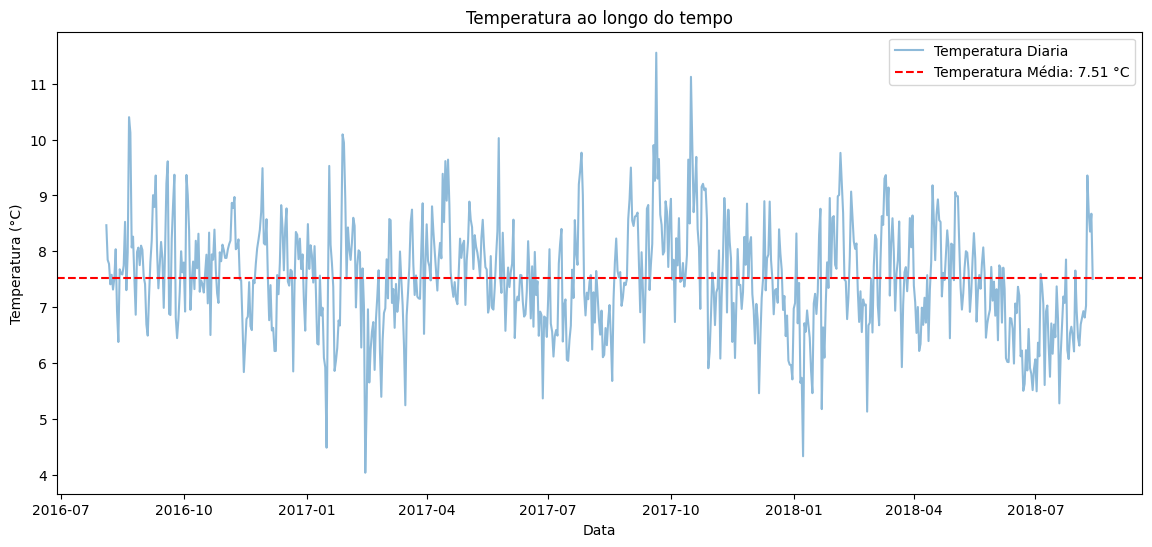

In [77]:

# Converter a coluna de data para o formato datetime
dados['Data'] = pd.to_datetime(dados['Data'], format='%m-%d-%Y')

# Extrair informações de mês e ano
dados['Mês'] = dados['Data'].dt.month
dados['Ano'] = dados['Data'].dt.year
# Calcular a precipitação média para o ano
temperatura_media = dados['media'].mean()

# Gráfico 1: Precipitação ao longo do tempo
plt.figure(figsize=(14, 6))

plt.plot(dados['Data'], dados['media'], label='Temperatura Diaria', alpha=0.5)
plt.axhline(y=temperatura_media, color='red', linestyle='--', label=f'Temperatura Média: {temperatura_media:.2f} °C')

plt.title('Temperatura ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [ ]:
f = '/home/matheus/Documentos/LACRIO/Analises/Cordillera Blanca/Weather Station Data/CasaDeAgua_CDAWX_4July13_1July19.csv'
df =  pd.read_csv(f, encoding="latin1")

df['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M')

df.set_index('Datetime', inplace=True)

# Calcular a média diária da variável de precipitação
media_diaria = df['Temperature (°C)'].resample('D').mean()

# Criar listas separadas de datas e médias
datas = media_diaria.index.strftime('%m/%d/%Y').tolist()  # Converter as datas para string no formato desejado
medias = media_diaria.tolist()  # Converter as médias para uma lista
datas = pd.to_datetime(datas)
df = pd.DataFrame({'data': datas, 'media': medias})


In [4]:

# Extrair informações de mês e ano
df['Mês'] = df['data'].dt.month
df['Ano'] = df['data'].dt.year

media_mensal = df.groupby('Mês')['media'].mean()

In [11]:

# Criar uma escala de cores baseada nos valores de precipitação
norm = mcolors.Normalize(vmin=media_mensal.min(), vmax=media_mensal.max())  # Normalização para o range dos dados
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)  # Usando a paleta 'viridis'


/tmp/ipykernel_10008/1274491168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_10008/1274491168.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


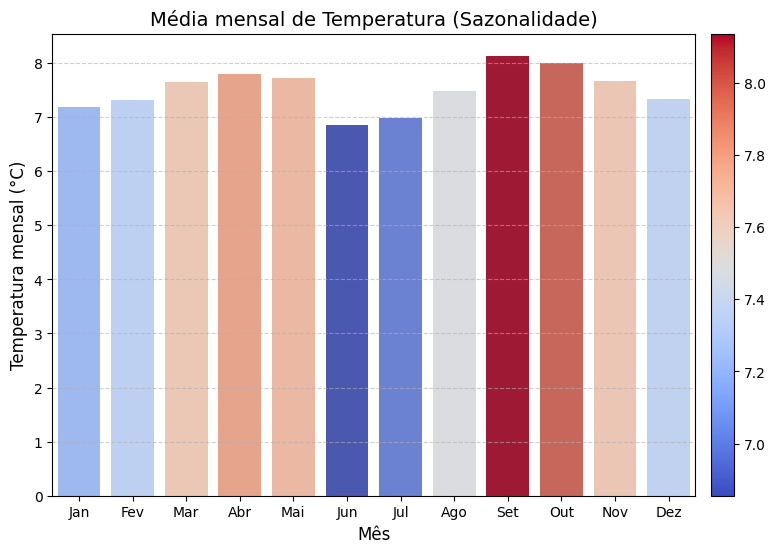

In [14]:
# Adicionar as cores ao gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=media_mensal.index,
    y=media_mensal.values,
    palette=sns.color_palette('coolwarm', as_cmap=True)(norm(media_mensal.values))
)

# Configurações do gráfico
plt.title('Média mensal de Temperatura (Sazonalidade)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Temperatura mensal (°C)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Adicionar uma barra de cores
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', pad=0.02)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()